## 1. Описание и начальная работа с данными

Необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет.
4. На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

course_contents = pd.read_csv("course_contents.csv", encoding="UTF-8")
courses = pd.read_csv("courses.csv", encoding="UTF-8")
progress_phases = pd.read_csv("progress_phases.csv", encoding="UTF-8")
progresses = pd.read_csv("progresses.csv", encoding="UTF-8")
students = pd.read_csv("students.csv", encoding="UTF-8")

progresses = progresses.rename(columns={"id": "progress_id"})
courses = courses.rename(columns={"id": "course_id"})
courses = courses.drop(columns='Unnamed: 0')
students = students.drop(columns='id_')
students = students.dropna(subset=['birthday'])
students = students.rename(columns={"id": "student_id"})

maindat = progress_phases.merge(progresses)
maindat = maindat.merge(courses, on='course_id')
maindat = maindat.merge(
    course_contents, on=['course_id', 'module_number', 'lesson_number'])
studentsdat = students.merge(progresses, on='student_id')
studentsdat = studentsdat.merge(courses, on='course_id')
conv = maindat

#3
col = maindat[maindat.is_homework == True].dropna()

общее количество курсов

In [33]:
print("Всего {} курсов".format(
    maindat.drop_duplicates(subset='title')['title'].count()))

Всего 15 курсов


количество модулей на каждом курсе

In [56]:
modules = maindat.drop_duplicates(subset='module_title')
modules[['title', 'module_number']].groupby('title').count()

,module_number
title,
Excel Базовый,8
Java-разработчик,16
Java-разработчик c нуля,2
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,10
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


количество уроков в каждом модуле на каждом курсе

In [58]:
lessons = maindat.drop_duplicates(subset='lesson_title')
lessons[['title', 'module_number', 'lesson_number']].groupby(
    ['title', 'module_number']
    ).count()

lesson_number
title                         module_number               
Excel Базовый                 1                          9
                              2                          5
                              3                          2
                              4                          6
                              5                          4
...                                                    ...
Руководитель digital-проектов 13                         3
                              14                         6
                              15                        11
                              16                         7
                              17                         4

[222 rows x 1 columns]

медианное количество уроков в модуле на каждом курсе

In [59]:
lessons_med  = maindat.drop_duplicates(subset='lesson_title')
lessons_med[['title', 'lesson_number']].groupby(['title']).agg('median')

,lesson_number
title,
Excel Базовый,3.0
Java-разработчик,4.0
Java-разработчик c нуля,8.0
JavaScript с нуля,4.0
PHP-разработчик с 0 до PRO. Часть 1,3.0
SMM-маркетолог от А до Я,3.0
UX-дизайн,3.0
Анимация интерфейсов,2.0
Веб-вёрстка для начинающих 2.0,3.0


количество учеников на каждом курсе

In [60]:
studs = maindat.drop_duplicates(subset='student_id')
studs[['title', 'student_id']].groupby('title').count()

,student_id
title,
Excel Базовый,723
Java-разработчик,697
Java-разработчик c нуля,284
JavaScript с нуля,878
PHP-разработчик с 0 до PRO. Часть 1,226
SMM-маркетолог от А до Я,450
UX-дизайн,721
Анимация интерфейсов,146
Веб-вёрстка для начинающих 2.0,367


минимальный, максимальный, средний, медианный возраст студентов

In [61]:
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')
students = students[(students['birthday'] > '1940-01-01') & (
    students['birthday'] < '2004-01-01')]
students['age'] = datetime.today() - students['birthday']
ages = students['age'] / np.timedelta64(1,'Y')
print("Минимальный {}, максимальный {},\n".format(
    ages.min(), ages.max())
)
print('средний {}, медианный {} возраст среди всех студентов'.format(
    ages.mean(), ages.median())
)

Минимальный 16.659458615068495, максимальный 80.4828088549776,

средний 30.039850627116852, медианный 29.319540615383357 возраст среди всех студентов


минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [62]:
studentsdat['birthday'] = pd.to_datetime(
    studentsdat['birthday'], errors='coerce'
    )
studentsdat = studentsdat[['student_id', 'birthday', 'title']]
studentsdat = studentsdat[(
    studentsdat['birthday'] > '1940-01-01') & (
        studentsdat['birthday'] < '2004-01-01')]
studentsdat['age'] = datetime.today() - studentsdat['birthday']
studentsdat['age'] = studentsdat['age'] / np.timedelta64(1,'Y')
studentsdat[['title', 'age']].groupby(['title']).agg(
    ['min', 'max', 'mean', 'median']
    )

age                                 
                                           min        max       mean     median
title                                                                          
Excel Базовый                        16.823733  61.199730  34.387497  34.410679
Java-разработчик                     16.711479  64.893167  30.326232  29.431795
Java-разработчик c нуля              16.826471  55.346085  30.519022  29.571428
JavaScript с нуля                    16.949677  59.669240  29.425468  28.574830
PHP-разработчик с 0 до PRO. Часть 1  16.949677  75.297213  30.381081  29.311327
SMM-маркетолог от А до Я             17.650581  52.353553  29.788268  28.971827
UX-дизайн                            16.845637  58.001855  30.921354  30.442083
Анимация интерфейсов                 16.845637  51.595152  30.405698  29.830161
Веб-вёрстка для начинающих 2.0       16.927774  59.669240  29.465262  28.533762
Веб-дизайн PRO 2.0                   16.812782  59.609006  29.283764  28.257233
Веб-дизайн Базовый                   17.483569  51.491112  29.383425  28.410556
Веб-дизайн с нуля 2.0                16.812782  75.863960  29.026641  27.884878
Веб-разработчик                      17.155020  51.370644  28.997149  28.368118
Интернет-маркетолог от Ingate        16.801830  60.290745  31.983924  31.156676
Руководитель digital-проектов        18.983942  55.233831  32.315174  31.983524

Постройте bar-chart, отражающий количество студентов на каждом курсе.
Ticks нужно развернуть так, чтобы они были читаемы.

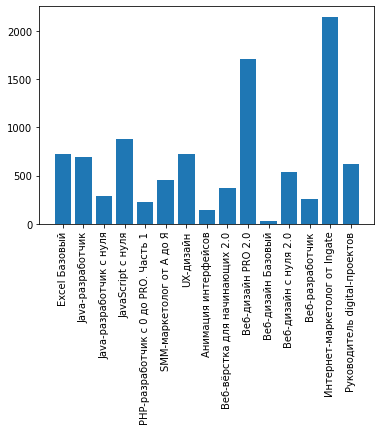

In [40]:
stu = studs[['title', 'student_id']].groupby('title').count().reset_index()
fig, subplot = plt.subplots()
subplot.bar(stu['title'], stu['student_id'])
plt.xticks(rotation='vertical')
plt.show()

Постройте горизонтальный (столбцы должны располагаться горизонтально)
bar-chart, отражающий количество студентов на каждом курсе.
График должен иметь заголовок.
Значения должны быть отсортированы.
Цвет столбцов должен содержать информацию о сфере,
к которой относится курс (то есть нужна легенда).
Прозрачность должна стоять на отметке 0.1.
На график должна быть нанесена линия медианы. У медианы должен быть свой цвет.

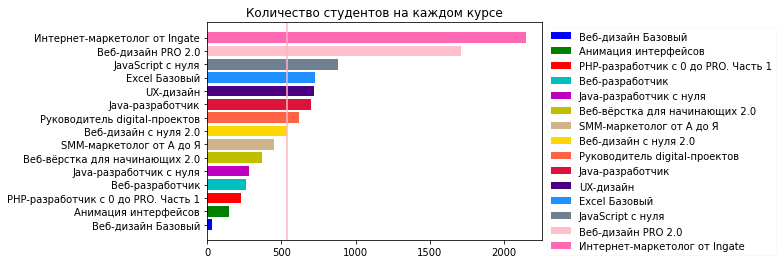

In [41]:
stu_sort = stu.sort_values('student_id')
fig, subplot = plt.subplots()
subplot.set_title('Количество студентов на каждом курсе')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 'tan', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for x, y, c in zip(stu_sort['title'], stu_sort['student_id'], colors):
    subplot.barh(x, y, color=c, label=x)
plt.axvline(stu.agg('median')[0], color='lightpink')
subplot.legend(bbox_to_anchor=(1, 1), framealpha=0.1)
plt.show()

Средний реальный возраст студентов 28.8 лет. Самый популярный курс "Интернет-маркетолог", наименее популярный "Веб-дизайн базовый".
Курсы по программированию пользуются меньшей популярностью, чем курсы по дизайну и маркетингу.
Наиболее интересные направления курсов - дизайн и маркетинг.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда).
4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда).
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю
(каждый месяц в диапазоне от марта 2016 до июля 2019 включительно).
Считать дату начала прохождения курса студентом по дате
начала первой домашней работы.

In [3]:
grow = maindat[maindat.is_homework == True].sort_values(
    'start_date').drop_duplicates(subset='progress_id')
grow['start_date'] = [data[:7] for data in grow['start_date']]
grow = grow[['start_date', 'student_id', 'title']]
grow_gr = grow.groupby(['title', 'start_date']).count().reset_index()

courses = [
           'Excel Базовый', 'UX-дизайн', 'UX-дизайн', 'UX-дизайн', 'UX-дизайн',
           'UX-дизайн', 'UX-дизайн', 'UX-дизайн', 'UX-дизайн', 'UX-дизайн',
           'UX-дизайн', 'UX-дизайн', 'Веб-дизайн Базовый', 'Веб-дизайн Базовый',
           'Веб-дизайн Базовый', 'Веб-дизайн Базовый', 'Веб-дизайн Базовый',
           'Веб-дизайн Базовый', 'Веб-дизайн Базовый', 'Веб-дизайн Базовый',
           'Веб-дизайн Базовый', 'Веб-дизайн Базовый', 'Веб-разработчик',
           'Веб-разработчик', 'Веб-разработчик', 'Веб-разработчик',
           'Веб-разработчик', 'Веб-разработчик', 'Веб-разработчик',
           'Веб-разработчик', 'Веб-разработчик', 'Веб-разработчик',
           'Веб-разработчик', 'Веб-разработчик', 'Веб-разработчик',
           'Веб-разработчик', 'Веб-разработчик', 'Веб-разработчик',
           'Веб-разработчик', 'Веб-разработчик', 'Веб-разработчик',
           'Веб-разработчик', 'Руководитель digital-проектов',
           'Руководитель digital-проектов', 'Руководитель digital-проектов',
           'Руководитель digital-проектов', 'Руководитель digital-проектов',
           'Руководитель digital-проектов', 'Руководитель digital-проектов'
]

date = [
        '2018-04', '2016-12', '2017-01', '2017-02', '2017-03', '2017-07',
        '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
        '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
        '2017-10', '2017-11', '2017-12', '2018-01', '2016-04', '2016-05',
        '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
        '2016-12', '2017-01', '2017-02', '2017-03', '2017-05', '2017-06',
        '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2019-04',
        '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
        '2018-01'
]

for course, date in zip(courses, date):
  grow_gr = grow_gr.append(
      {'title': course, 'start_date': date, 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.sort_values(['title', "start_date"])
grow_gr

,title,start_date,student_id
0,Excel Базовый,2018-02,6
1,Excel Базовый,2018-03,3
244,Excel Базовый,2018-04,0
2,Excel Базовый,2018-05,3
3,Excel Базовый,2018-06,9
...,...,...,...
239,Руководитель digital-проектов,2019-03,36
240,Руководитель digital-проектов,2019-04,17
241,Руководитель digital-проектов,2019-05,25
242,Руководитель digital-проектов,2019-06,15


На основании первого пункта построить
line-graph с приростом студентов в каждом месяце
для каждого курса. 15 графиков.
Графики должны иметь заголовки, оси должны быть подписаны.
Ticks нужно развернуть так, чтобы они были читаемы.

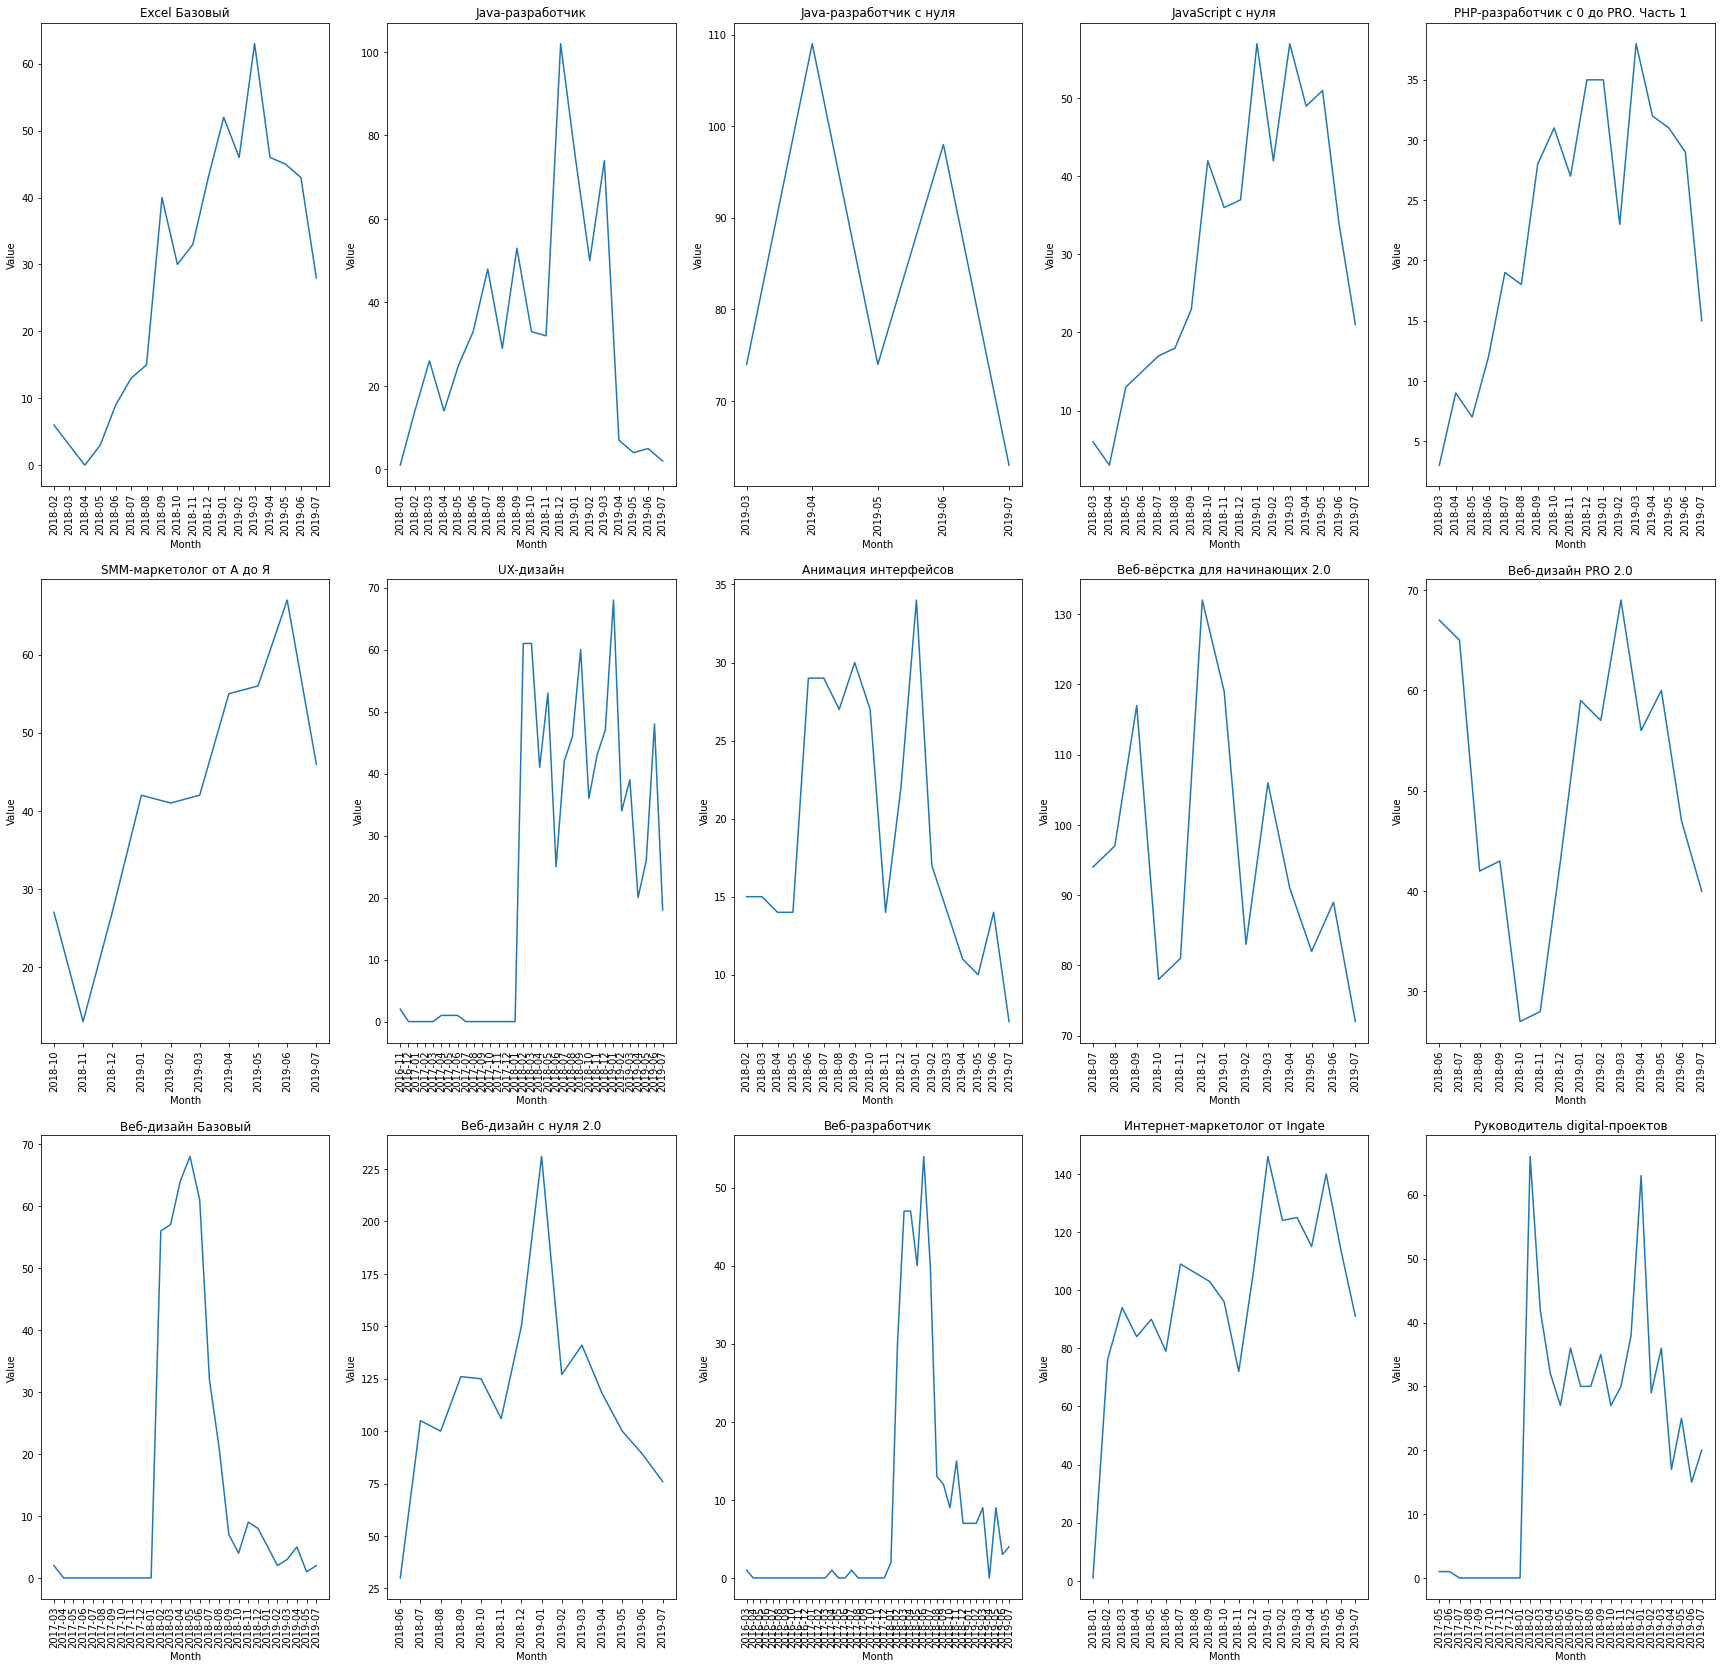

In [9]:
fig = plt.figure(figsize = (30, 29))
for title, i in zip(
    grow.sort_values('title').drop_duplicates(subset='title')['title'],
    range(1, 16)):
  subploti = fig.add_subplot(3, 5, i)
  subploti.set_title(title)
  subploti.plot(
      grow_gr[grow_gr.title == title]['start_date'],
      grow_gr[grow_gr.title == title]['student_id']
      )
  subploti.set_xlabel('Month')
  subploti.set_ylabel('Value')
  plt.xticks(rotation='vertical')

На основании первого пункта построить line-graph с несколькими линиями,
отражающими прирост студентов
в каждом месяце для каждого курса. 15 линий на графике.
Ticks нужно развернуть так, чтобы они были читаемы.
График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана.
Линия для каждого курса должна иметь свой цвет (нужна легенда).

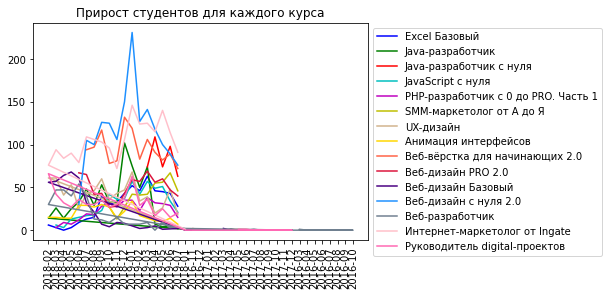

In [44]:
fig, subplot = plt.subplots()
subplot.set_title('Прирост студентов для каждого курса')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 'tan', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for title, color in zip(
    grow.sort_values('title').drop_duplicates(subset='title')['title'], colors):
  subplot.plot(grow_gr[grow_gr.title == title]['start_date'],
               grow_gr[grow_gr.title == title]['student_id'],
                color=color,
                label=title
               )
plt.xticks(rotation='vertical')
subplot.legend(bbox_to_anchor=(1, 1))
plt.show() 

Рассчитать количество прогрессов по выполнению домашних работ
в каждом месяце за всю историю
(каждый месяц в диапазоне от марта 2016 до июля 2019 включительно)
для каждого курса.
Учитывать, что выполнение домашнего задания может перетекать
из одного месяца в другой
(такие дз надо включать в общее число прогрессов для всех месяцев,
которые покрывает срок выполнения этих дз)

In [10]:
hwdat = maindat[
                maindat.is_homework == True][[
                                              'progress_id',
                                              'start_date',
                                              'finish_date',
                                              'title']].sort_values(
                                                  'start_date').fillna(
                                                      '2019-07')
hwdat['start_date'] = [date[:7] for date in hwdat['start_date']]
hwdat['finish_date'] = [date[:7] for date in hwdat['finish_date']]
for index, row in hwdat.iterrows():
    if row[1] != row[2]:
        sy = int(row[1][:4])
        sm = int(row[1][5:7])
        ey = int(row[2][:4])
        em = int(row[2][5:7])
        rm = em - sm
        if rm < 0:
            rm += 12
        if sm != em:
            for i in range(1, rm+1):
                smn = sm + i
                if smn < 10 and em < 10:
                    hwdat = hwdat.append({'progress_id':row[0],
                                          'start_date':'{}-0{}'.format(sy, smn), 
                                          "finish_date":'{}-0{}'.format(ey, em),
                                          'title':row[3]}, ignore_index=True)
                elif smn < 10:
                    hwdat = hwdat.append({'progress_id':row[0],
                                          'start_date':'{}-0{}'.format(sy, smn),
                                          "finish_date":'{}-{}'.format(ey, em),
                                          'title':row[3]}, ignore_index=True)
                elif em < 10:
                    hwdat = hwdat.append({'progress_id':row[0],
                                          'start_date':'{}-{}'.format(sy, smn),
                                          "finish_date":'{}-0{}'.format(ey, em),
                                          'title':row[3]}, ignore_index=True)
                else:
                    hwdat = hwdat.append({'progress_id':row[0],
                                          'start_date':'{}-{}'.format(sy, smn),
                                          "finish_date":'{}-{}'.format(ey, em),
                                          'title':row[3]}, ignore_index=True)
        syo = int(row[1][:4])
        smo = int(row[1][5:7])
        eyo = int(row[2][:4])
        emo = int(row[2][5:7])
        if syo != eyo and smo > 12:
            smon = smo - 12
            if smon < 10:
                hwdat.loc[index, 'start_date'] = '{}-0{}'.format(eyo, smon)
            else:
                hwdat.loc[index, 'start_date'] = '{}-{}'.format(eyo, smon)
hwdat = hwdat[['progress_id', 'start_date', 'title']]
hwdat.groupby(['title', 'start_date']).count()

progress_id
title                         start_date             
Excel Базовый                 2018-02              37
                              2018-03               9
                              2018-04              16
                              2018-05              21
                              2018-06              41
...                                               ...
Руководитель digital-проектов 2019-03             407
                              2019-04             354
                              2019-05             390
                              2019-06             373
                              2019-07             379

[356 rows x 1 columns]

Построить line-graph по четвертому пункту. 15 графиков.
Графики должны иметь заголовки, оси должны быть подписаны.
Ticks нужно развернуть так, чтобы они были читаемы.

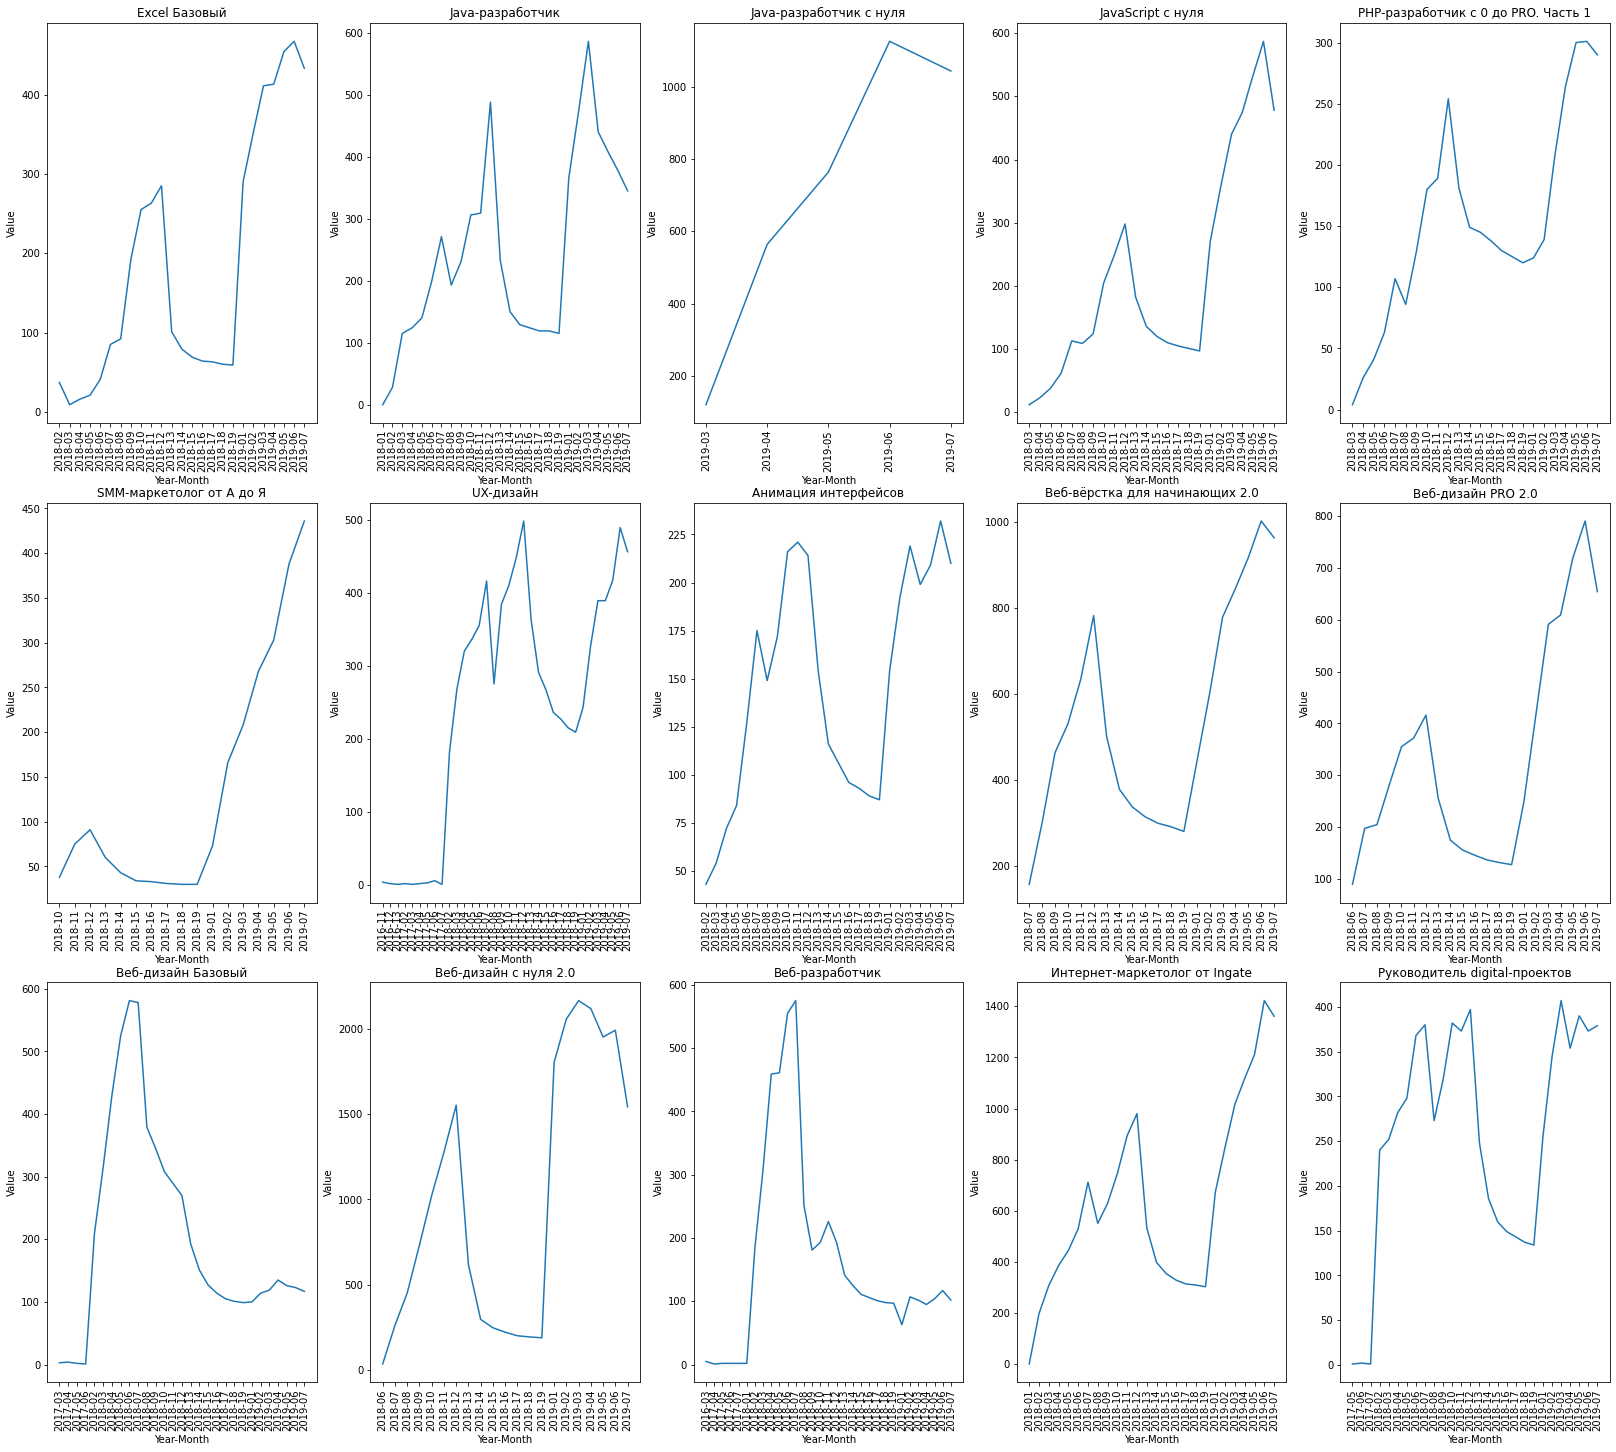

In [11]:
fig = plt.figure(figsize = (28, 25))
hwdat_gr = hwdat.groupby(['title', 'start_date']).count().reset_index()
for title, i in zip(hwdat.sort_values('title').drop_duplicates(
    subset='title')['title'], range(1, 16)):
  subploti = fig.add_subplot(3, 5, i)
  subploti.set_title(title)
  subploti.plot(
      hwdat_gr[hwdat_gr.title == title]['start_date'],
      hwdat_gr[hwdat_gr.title == title]['progress_id']
      )
  subploti.set_xlabel('Year-Month')
  subploti.set_ylabel('Value')
  plt.xticks(rotation='vertical')

Построить один line-graph для всех курсов по четвертому пункту.
15 линий на графике.
Ticks нужно развернуть так, чтобы они были читаемы.
График должен иметь заголовок.
Ось, отражающая количество прогрессов, должна быть подписана.
Линия для каждого курса должна иметь свой цвет (нужна легенда).

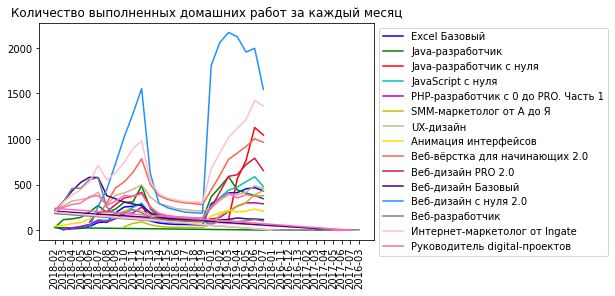

In [47]:
fig, subplot = plt.subplots()
subplot.set_title('Количество выполненных домашних работ за каждый месяц')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 'tan', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for title, color in zip(hwdat.sort_values('title').drop_duplicates(
    subset='title')['title'], colors):
  subplot.plot(hwdat_gr[hwdat_gr.title == title]['start_date'],
               hwdat_gr[hwdat_gr.title == title]['progress_id'],
               color=color,
               label=title
               )
plt.xticks(rotation='vertical')
subplot.legend(bbox_to_anchor=(1, 1))
plt.show()

На курс "Интернет-маркетолог" пришло больше всего людей за первое полугодие.
Даже не смотря на падение роста, на этот курс приходило больше всего людей.
Больше всего ДЗ выполнено на курсе "Веб-дизайн с нуля 2.0".

## 3. Выявление проблемных модулей

1. Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда).
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [83]:
maindat['start_date'] = pd.to_datetime(maindat['start_date'])
maindat['finish_date'] = pd.to_datetime(maindat['finish_date'])
hwtime = maindat[maindat.is_homework == True].dropna()
hw = hwtime[['progress_id', 'module_number',
             'start_date', 'finish_date', 'title']]
for index, row in hw.iterrows():
    if row[2] > row[3]:
        hw.loc[index, 'start_date'] = row[3]
hw['time_spend'] = hw['finish_date'] - hw['start_date']
hw.sort_values('time_spend')
hwgroup = hw[['module_number', 'title', 'time_spend']]
a = hwgroup.groupby(['title', 'module_number']).agg(
    ['min', 'max']).reset_index()
c = hwgroup.groupby(['title', 'module_number']).apply(np.mean).drop(
    columns='module_number').reset_index()
d = hwgroup.groupby(['title', 'module_number']).apply(
    np.median).to_frame().reset_index()
a.columns = ['title', 'module_number', 'min', 'max']
hwgr = a.merge(c, on=['title', 'module_number'])
hwgr = hwgr.merge(d, on=['title', 'module_number'])
hwgr.columns = ['title', 'module_number', 'min', 'max', 'mean', 'median']
hwgr

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,title,module_number,min,max,mean,median
0,Excel Базовый,1,0 days,183 days 17:57:52.247793,5 days 23:47:54.195384,2 days 07:24:50.049678
1,Excel Базовый,2,0 days,184 days 06:27:48.841839,4 days 07:20:42.029637,1 days 20:24:06.134843
2,Excel Базовый,3,0 days,89 days 03:11:50.758958,3 days 09:55:13.662157,1 days 11:54:27.957196
3,Excel Базовый,4,0 days,327 days 13:09:58.465046,10 days 21:22:39.171689,3 days 04:58:46.128977
4,Excel Базовый,5,0 days,175 days 13:10:49.724595,7 days 08:15:41.042990,2 days 23:30:55.474674
...,...,...,...,...,...,...
185,Руководитель digital-проектов,12,0 days,211 days 13:38:10.145467,21 days 06:12:48.774700,7 days 00:41:40.763640
186,Руководитель digital-проектов,13,0 days,246 days 20:15:03.960003,26 days 01:18:58.103489,11 days 10:54:30.868306
187,Руководитель digital-проектов,14,0 days,199 days 03:15:55.467643,14 days 15:20:12.798249,7 days 18:42:35.495710
188,Руководитель digital-проектов,15,0 days,132 days 04:58:36.764804,6 days 15:00:45.428858,2 days 10:52:21.830890


На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса.
15 графиков. Графики должны иметь заголовки.

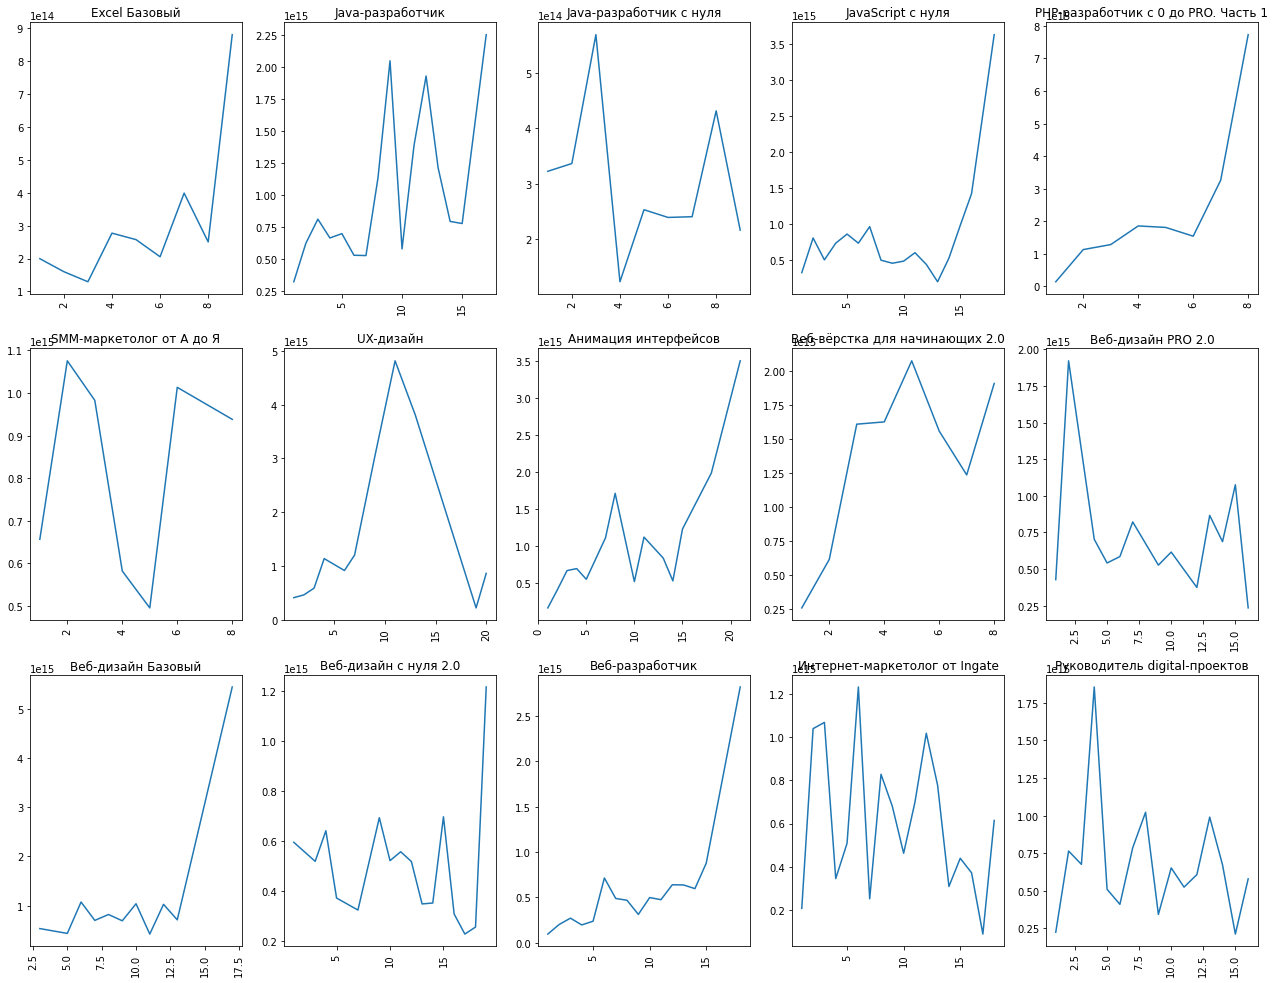

In [49]:
fig = plt.figure(figsize = (22, 17))
hw_graph = hwgroup.groupby(
    ['title', 'module_number']).apply(np.median).reset_index()
for title, i in zip(hwgroup.sort_values('title').drop_duplicates(
    subset='title')['title'], range(1, 16)):
  subploti = fig.add_subplot(3, 5, i)
  subploti.set_title(title)
  subploti.plot(hw_graph[hw_graph.title == title]['module_number'],
                hw_graph[hw_graph.title == title][0]
                )
  plt.xticks(rotation='vertical')

Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам
(12 месяцев, январь-декабрь) для каждого курса.

In [84]:
hw_m = hw[['title', 'time_spend']]
hw_m['month'] = [i[5:7] for i in col['start_date']]
hw_m.groupby(['title', 'month']).apply(np.median)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


title                          month
Excel Базовый                  01       2 days 05:15:40.334257
                               02       2 days 05:46:39.750756
                               03       2 days 19:52:58.386801
                               04       1 days 22:33:43.881223
                               05       2 days 09:55:16.146759
                                                 ...          
Руководитель digital-проектов  08      13 days 13:27:50.949325
                               09      10 days 02:37:07.207776
                               10       4 days 20:23:30.326083
                               11       6 days 00:05:40.666425
                               12       7 days 22:30:12.242404
Length: 171, dtype: timedelta64[ns]

На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с
медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок.
Ось, отражающая время прохождения, должна быть подписана.
Линия для каждого курса должна иметь свой цвет (нужна легенда).

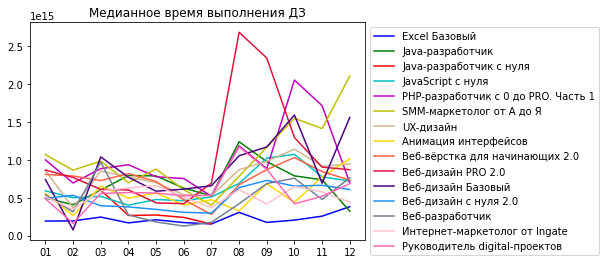

In [51]:
fig, subplot = plt.subplots()
hw_m_gr = hw_m.groupby(['title', 'month']).apply(np.median).reset_index()
subplot.set_title('Медианное время выполнения ДЗ')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 'tan', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for title, color in zip(hw_m.sort_values('title').drop_duplicates(
    subset='title')['title'], colors):
  subplot.plot(hw_m_gr[hw_m_gr.title == title]['month'],
               hw_m_gr[hw_m_gr.title == title][0],
               color=color,
               label=title
               )
subplot.legend(bbox_to_anchor=(1, 1))
plt.show()

Дольше всего ДЗ выполняются с июля по сентябрь.
По курсу "Веб-дизайн PRO 2.0" самые тяжелые ДЗ. 

## 4. Расчет конверсии

1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет.
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе.
Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле
(если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов,
сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [85]:
conver = conv[conv.is_homework == True]
conversion = conver[[
                     'module_number',
                     'status',
                     'student_id',
                     'title',
                     'field']] .sort_values(['title', 'module_number'])
conv_data = conversion.groupby(
    ['title', 'module_number', 'status']).count().reset_index()
conv_dat = conv_data[conv_data.status == 'done'].drop(
    [27, 75, 109, 165, 189, 214, 253, 294, 325, 373, 411, 472, 521, 584, 639])
conv_da = conv_dat.groupby(
    ['title', 'module_number'])['student_id'].sum().reset_index()
conv_da['module_number'] = [i + 1 for i in conv_da['module_number']]
ch = conv_data[(
    conv_data.status == 'start') | (
        conv_data.status == 'wait') |  (
            conv_data.status == 'done') | (
                conv_data.status == 'fail')] .groupby(
                    ['title', 'module_number']
                    )['student_id'].sum().reset_index()
for title in conv_da.drop_duplicates('title')['title']:
    conv_da = conv_da.append(
        {'title':title, 'module_number':1, 'student_id':0}, ignore_index=True
        )    
conv_da = conv_da.sort_values(['title', 'module_number'])
conv_da = conv_da.reset_index()
ch = ch.drop([82, 84, 87, 90, 91]).reset_index()
conv_da = conv_da.drop([82, 84, 89, 90]).reset_index()
r = conv_data[['title', 'module_number']].drop_duplicates().drop(
    [271, 277, 283, 291, 294]).reset_index()
r = r.drop(columns='index')
r['res'] = ch['student_id'] / conv_da['student_id']
r = r.replace([np.inf, -np.inf], 0)
r

,title,module_number,res
0,Excel Базовый,1,0.000000
1,Excel Базовый,2,0.947598
2,Excel Базовый,3,0.980296
3,Excel Базовый,4,0.891473
4,Excel Базовый,5,0.983498
...,...,...,...
181,Руководитель digital-проектов,12,0.969388
182,Руководитель digital-проектов,13,0.988636
183,Руководитель digital-проектов,14,1.028986
184,Руководитель digital-проектов,15,1.031250


Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.
График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы.

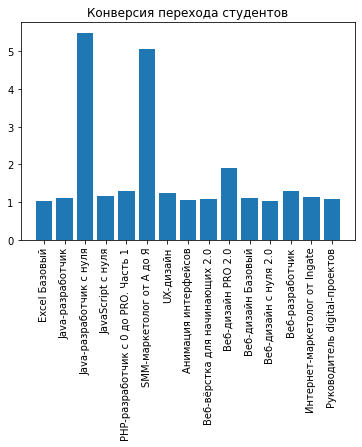

In [54]:
fig, subplot = plt.subplots()
subplot.set_title('Конверсия перехода студентов')
subplot.bar(r['title'],
            r['res'])
plt.xticks(rotation='vertical')
plt.show()

Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart,
отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков.
Графики должны иметь заголовки. Ticks должны содержать номер и название модуля.
Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда).
Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса.
У медианы должен быть свой цвет.

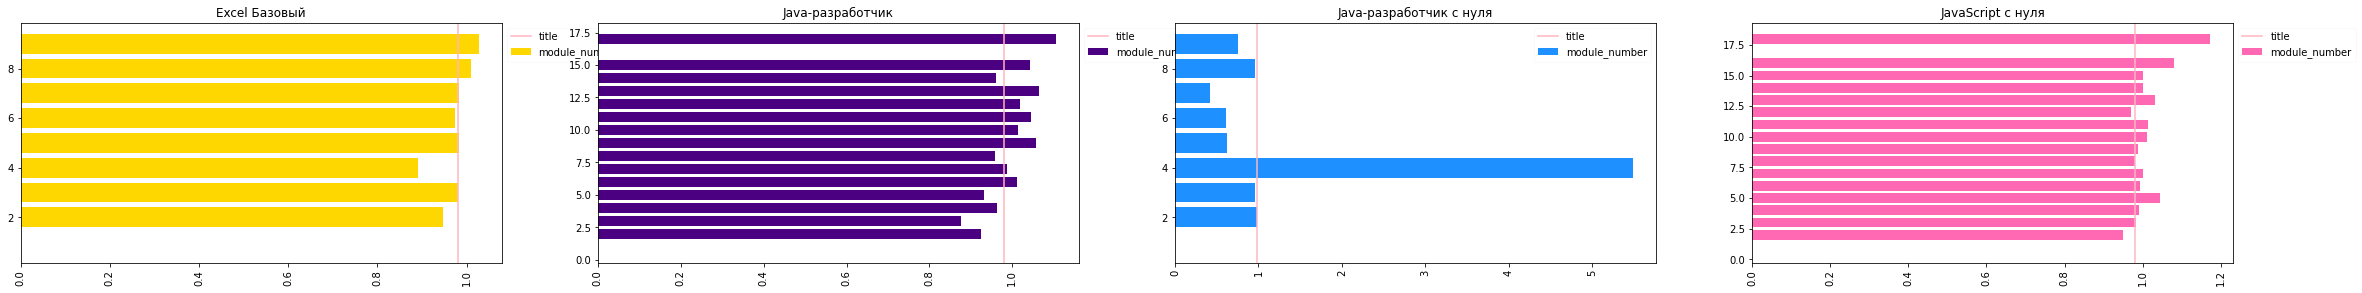

In [55]:
field = conversion[['title', 'field']]
field = field.drop_duplicates()
r = r.merge(field, on='title')
r.drop_duplicates('field')
fig = plt.figure(figsize = (50, 15))
colors = ['gold', 'indigo', 'dodgerblue', 'hotpink']
for title, i, field, c in zip(
    r.drop_duplicates(subset='title')['title'],
    range(1, 16),
    field['field'],
    colors):
  subploti = fig.add_subplot(3, 5, i)
  subploti.set_title(title)
  subploti.barh(r[(r.title == title) & (r.field == field)]['module_number'],
                r[(r.title == title) & (r.field == field)]['res'],
                color=c
                )
  plt.xticks(rotation='vertical')
  plt.axvline(r.groupby('title').agg('median')['res'][0], color='lightpink')
  subploti.legend(r[r.field == field], bbox_to_anchor=(1, 1), framealpha=0.1)

Лучшая конверсия на курсе java разработчик с нуля, худшая на анимация интерфейсов.